In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import sklearn.metrics

Since Train data and Test data both will have missing value, we combine both the dataset and treat the missing values. Exclude the SalesPrice column before treating missing values from train dataset

In [65]:
df_train=pd.read_csv("train.csv")

In [131]:
df_test=pd.read_csv("test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [106]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train1=df_train.iloc[:,0:80] #select all columns except SalesPrice from train dataset.
df_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [122]:
#data=pd.concat([df_train1,df_test],axis=0) # combine tain and test dataset, use axis 0 to combine rows with same columns.

In [66]:
df_train.info() # check the columns to be same

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [80]:
na_list1=df_train.columns[df_train.isna().any()].tolist() #create list of columns having atleast one empty or NAN value

In [148]:
na_list2=df_test.columns[df_test.isna().any()].tolist()

In [134]:
print(na_list1)

[]


In [149]:
print(na_list2)

[]


# Review with the data description, divide the columns where NA has meaning and NA to be an error.


In [135]:
na_no_meaning=['MSZoning','LotFrontage','Utilities','Exterior1st','Exterior2nd','LotFrontage','MasVnrType',
                     'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', 'Electrical', 'BsmtFullBath',
                     'BsmtHalfBath',
                     'KitchenQual', 'Functional','GarageCars','GarageArea', 'GarageYrBlt','SaleType']

In [136]:
na_meaning=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
            'GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [73]:
na_no_meaning

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'SaleType']

In [74]:
na_meaning

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [28]:
print(df_train["GarageYrBlt"].dtype)

float64


In [144]:
#replace the columns in list which has no meaning for missing values with mean of the column. as the datatype is float.

for col in na_no_meaning:
    if df_train[col].dtype=='float64':
        #print (data[col].dtype)
        df_train[col].fillna(np.mean(df_train[col]),inplace=True)
        
        
for col in na_no_meaning:
    if df_test[col].dtype=='float64':
        #print (data[col].dtype)
        df_test[col].fillna(np.mean(df_test[col]),inplace=True)        

In [27]:
df_train.MasVnrType.dtype

dtype('O')

In [145]:
#replace the column with datatype as 'Object' with Mode of the column.

for col in na_no_meaning:
    if df_train[col].dtype=='O':
        #print (data[col].dtype)
        df_train[col].fillna(statistics.mode(df_train[col]),inplace=True)

        
        
for col in na_no_meaning:
    if df_test[col].dtype=='O':
        #print (data[col].dtype)
        df_test[col].fillna(statistics.mode(df_test[col]),inplace=True)

In [41]:
df_train.Alley.isna().value_counts()

True     1369
False      91
Name: Alley, dtype: int64

In [155]:
data.BsmtExposure.dtype

dtype('O')

In [146]:
#replace the values for NA in columns which has meaniing with 0 for integer.

for col in na_meaning:
    if df_train[col].dtype=='int64':
        #print (data[col].dtype)
        df_train[col].fillna(0,inplace=True)
        
        
for col in na_meaning:
    if df_test[col].dtype=='int64':
        #print (data[col].dtype)
        df_test[col].fillna(0,inplace=True)

In [147]:
#replace the values with NA which has meaning for datatype as 'Object' with Not Present.

for col in na_meaning:
    if df_train[col].dtype=='O':
        #print (data[col].dtype)
        df_train[col].fillna('Not Present',inplace=True)
        
for col in na_meaning:
    if df_test[col].dtype=='O':
        #print (data[col].dtype)
        df_test[col].fillna('Not Present',inplace=True)

In [47]:
df_train.BsmtExposure.value_counts()

No             953
Av             221
Gd             134
Mn             114
Not Present     38
Name: BsmtExposure, dtype: int64

In [52]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [53]:
df_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [54]:
df_train.shape

(1460, 81)

In [184]:
data.shape

(2919, 80)

In [61]:
df_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [140]:
#For selecting the relevant columns from datatype Object, find the maximinum occuramce of value and divide by the total 
#number of rows.

for col in df_train.columns:
    if df_train[col].dtype=='O':
        max_percent = max (df_train[col].value_counts())/1460
        print(col)
        print(max_percent)

MSZoning
0.7883561643835616
Street
0.9958904109589041
Alley
0.9376712328767123
LotShape
0.6335616438356164
LandContour
0.897945205479452
Utilities
0.9993150684931507
LotConfig
0.7205479452054795
LandSlope
0.9465753424657535
Neighborhood
0.1541095890410959
Condition1
0.863013698630137
Condition2
0.9897260273972602
BldgType
0.8356164383561644
HouseStyle
0.49726027397260275
RoofStyle
0.7815068493150685
RoofMatl
0.9821917808219178
Exterior1st
0.3527397260273973
Exterior2nd
0.3452054794520548
MasVnrType
0.5972602739726027
ExterQual
0.6205479452054794
ExterCond
0.8780821917808219
Foundation
0.44315068493150683
BsmtQual
0.44452054794520546
BsmtCond
0.897945205479452
BsmtExposure
0.6527397260273973
BsmtFinType1
0.2945205479452055
BsmtFinType2
0.8602739726027397
Heating
0.9780821917808219
HeatingQC
0.5075342465753425
CentralAir
0.934931506849315
Electrical
0.9143835616438356
KitchenQual
0.5034246575342466
Functional
0.9315068493150684
FireplaceQu
0.4726027397260274
GarageType
0.5958904109589042

In [127]:
for col in df_train.columns:
    if df_train[col].dtype=='O':
        if (max(df_train[col].value_counts())/1460)>0.85:
            print([col])

['Street']
['Alley']
['LandContour']
['Utilities']
['LandSlope']
['Condition1']
['Condition2']
['RoofMatl']
['ExterCond']
['BsmtCond']
['BsmtFinType2']
['Heating']
['CentralAir']
['Electrical']
['Functional']
['GarageQual']
['GarageCond']
['PavedDrive']
['PoolQC']
['MiscFeature']
['SaleType']


In [85]:
#Take reference as '0.85 percent' and anything below that will have less bias to the final model.

for col in df_train.columns:
    if df_train[col].dtype=='O':
        if (max(df_train[col].value_counts())/1460)<0.85:
            print(col)

MSZoning
LotShape
LotConfig
Neighborhood
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
Foundation
BsmtQual
BsmtExposure
BsmtFinType1
HeatingQC
KitchenQual
FireplaceQu
GarageType
GarageFinish
Fence
SaleCondition


In [86]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [87]:
#to do the analysis to find correlation we seperate the data between datatyp of Object and Numerical. Create new dataset.

data1=pd.DataFrame()
for col in df_train.columns:
    if ((df_train[col].dtype=='int64') | (df_train[col].dtype=='float64')):
        #data1=data.iloc[:,1,3,4,17,18,19,20,26,34,36,27,28,43:52,54,56,59,61,62]
       # data1=[data1,data[col]]
        data1=pd.concat([data1,pd.DataFrame(df_train[col])],axis=1)

In [88]:
data1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [270]:
df_train2=df_train.iloc[:,-1]
df_train2

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [89]:
#data1=pd.concat([data1,df_train2],join='inner',axis=1)
#data1.head()
data1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [90]:
data1.SalePrice.value_counts()
data1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1, 'Correlation between features')

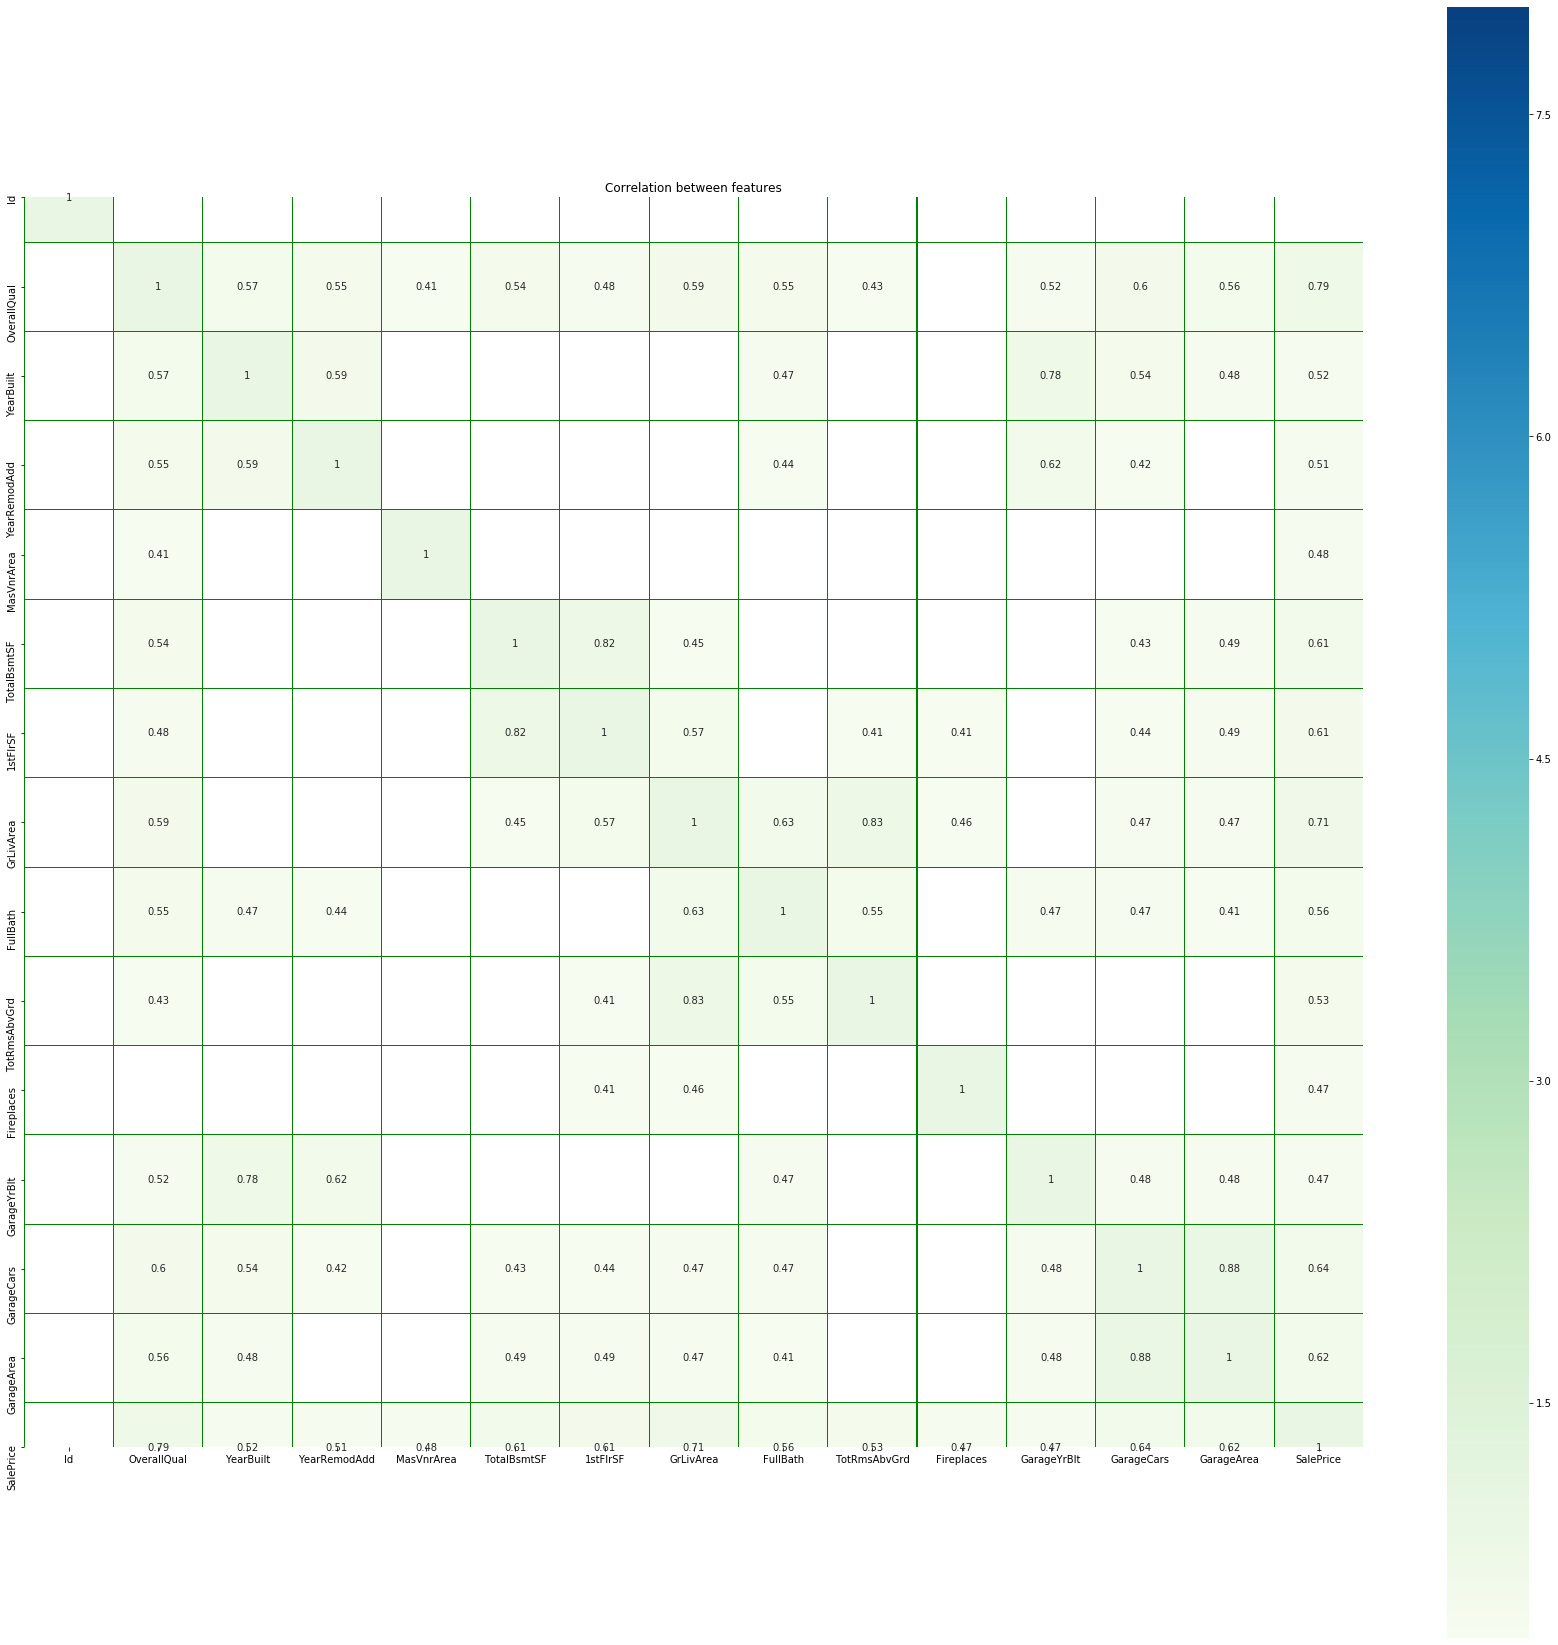

In [150]:
#Find correlation between SalesPrice and other attributes, select the attribute 

import matplotlib.pyplot as plt
import seaborn as sns

corr=data1.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], vmax=8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="green")
plt.title('Correlation between features')

In [92]:
data1=data1.drop(labels=['MSSubClass','LotFrontage','LotArea','OverallCond','BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF','2ndFlrSF',
       'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],axis=1)

In [152]:
df_test=df_test.drop(labels=['MSSubClass','LotFrontage','LotArea','OverallCond','BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF','2ndFlrSF',
       'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Street','Alley','LandContour','Utilities','LandSlope',
                            'Condition1','Condition2','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating',
                            'CentralAir',
'Electrical',
'Functional',
'GarageQual',
'GarageCond',
'PavedDrive','PoolQC',
'MiscFeature','SaleType'],axis=1)

In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
Id              1460 non-null int64
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
MasVnrArea      1460 non-null float64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageYrBlt     1460 non-null float64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
SalePrice       1460 non-null int64
dtypes: float64(2), int64(13)
memory usage: 171.2 KB


In [123]:
df_test  = data11

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
Id               1459 non-null int64
MSZoning         1459 non-null object
LotShape         1459 non-null object
LotConfig        1459 non-null object
Neighborhood     1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
MasVnrArea       1459 non-null float64
ExterQual        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     1459 non-null object
TotalBsmtSF      1459 non-null float64
HeatingQC        1459 non-null object
1stFlrSF         1459 non-null int64
GrLivArea        1459 

In [94]:
#data2=pd.DataFrame()
data2=pd.DataFrame(df_train,columns=['MSZoning','LotShape','LotConfig','Neighborhood','BldgType','HouseStyle','RoofStyle','Exterior1st',
                                 'Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1',
                                 'HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish','Fence','SaleCondition'])

In [95]:
data2

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,No,GLQ,Ex,Gd,Not Present,Attchd,RFn,Not Present,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,...,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,Not Present,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,Not Present,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,...,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,Not Present,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,Not Present,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,1Fam,2Story,Gable,VinylSd,VinylSd,None,...,Gd,No,Unf,Ex,TA,TA,Attchd,RFn,Not Present,Normal
1456,RL,Reg,Inside,NWAmes,1Fam,1Story,Gable,Plywood,Plywood,Stone,...,Gd,No,ALQ,TA,TA,TA,Attchd,Unf,MnPrv,Normal
1457,RL,Reg,Inside,Crawfor,1Fam,2Story,Gable,CemntBd,CmentBd,None,...,TA,No,GLQ,Ex,Gd,Gd,Attchd,RFn,GdPrv,Normal
1458,RL,Reg,Inside,NAmes,1Fam,1Story,Hip,MetalSd,MetalSd,None,...,TA,Mn,GLQ,Gd,Gd,Not Present,Attchd,Unf,Not Present,Normal


In [96]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
MSZoning         1460 non-null object
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
ExterQual        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
HeatingQC        1460 non-null object
KitchenQual      1460 non-null object
FireplaceQu      1460 non-null object
GarageType       1460 non-null object
GarageFinish     1460 non-null object
Fence            1460 non-null object
SaleCondition    1460 non-null object
dtypes: object(22)
memory usage: 251.1+ KB


In [117]:
data12=pd.DataFrame(df_test,columns=['MSZoning','LotShape','LotConfig','Neighborhood','BldgType','HouseStyle','RoofStyle','Exterior1st',
                                 'Exterior2nd','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure','BsmtFinType1',
                                 'HeatingQC','KitchenQual','FireplaceQu','GarageType','GarageFinish','Fence','SaleCondition'])

In [97]:
data3=pd.concat(([data1, data2]), axis=1, sort=False)

In [119]:
data4=pd.concat(([data11, data12]), axis=1, sort=False)

In [160]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
Id               1459 non-null int64
OverallQual      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
GrLivArea        1459 non-null int64
FullBath         1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
Fireplaces       1459 non-null int64
GarageYrBlt      1459 non-null float64
GarageCars       1459 non-null float64
GarageArea       1459 non-null float64
MSZoning         1459 non-null int64
LotShape         1459 non-null int64
LotConfig        1459 non-null int64
Neighborhood     1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
RoofStyle        1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
MasVnrType       1459 non-null i

In [99]:
from sklearn.preprocessing import LabelEncoder
df_new = data3.select_dtypes(exclude=['int64', 'float64'])
df_new1 = data3.select_dtypes(include=['int64', 'float64'])
df_encoded = df_new.apply(LabelEncoder().fit_transform)
data3 = df_new1.join(df_encoded )
data3.dtypes

Id                 int64
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
TotalBsmtSF        int64
1stFlrSF           int64
GrLivArea          int64
FullBath           int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
SalePrice          int64
MSZoning           int64
LotShape           int64
LotConfig          int64
Neighborhood       int64
BldgType           int64
HouseStyle         int64
RoofStyle          int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
ExterQual          int64
Foundation         int64
BsmtQual           int64
BsmtExposure       int64
BsmtFinType1       int64
HeatingQC          int64
KitchenQual        int64
FireplaceQu        int64
GarageType         int64
GarageFinish       int64
Fence              int64
SaleCondition      int64
dtype: object

In [120]:
data4

,Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,1461,5,1961,1961,0.0,882.0,896,896,1,5,...,4,3,5,4,3,3,1,3,2,4
1,1462,6,1958,1958,108.0,1329.0,1329,1329,1,6,...,4,3,0,4,2,3,1,3,4,4
2,1463,5,1997,1998,0.0,928.0,928,1629,2,6,...,2,3,2,2,3,5,1,0,2,4
3,1464,6,1998,1998,20.0,926.0,926,1604,2,7,...,4,3,2,0,2,2,1,0,4,4
4,1465,8,1992,1992,0.0,1280.0,1280,1280,2,5,...,2,3,0,0,2,3,1,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,1970,1970,0.0,546.0,546,1092,1,5,...,4,3,6,2,3,3,6,1,4,4
1455,2916,4,1970,1970,0.0,546.0,546,1092,1,6,...,4,3,5,4,3,3,4,3,4,0
1456,2917,5,1960,1996,0.0,1224.0,1224,1224,1,7,...,4,3,0,0,3,5,5,3,4,0
1457,2918,5,1992,1992,0.0,912.0,970,970,1,6,...,2,0,2,4,3,3,6,1,2,4


In [159]:
from sklearn.preprocessing import LabelEncoder
df_new = df_test.select_dtypes(exclude=['int64', 'float64'])
df_new1 = df_test.select_dtypes(include=['int64', 'float64'])
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_test = df_new1.join(df_encoded )

In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 57 columns):
Id               1459 non-null int64
OverallQual      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1459 non-null float64
TotalBsmtSF      1459 non-null float64
1stFlrSF         1459 non-null int64
GrLivArea        1459 non-null int64
FullBath         1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
Fireplaces       1459 non-null int64
GarageYrBlt      1459 non-null float64
GarageCars       1459 non-null float64
GarageArea       1459 non-null float64
MSZoning         1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null i

In [319]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data3.drop(['SalePrice'],axis=1),data3['SalePrice'], test_size=0.25,random_state=10)

In [320]:
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1095, 36)
x_test  (365, 36)
y_train  (1095,)
y_test  (365,)


In [321]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [322]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
pred=reg.predict(x_test)
pred[0:25]

array([170505.93317746, 201274.07592218, 131062.22162143, 149885.81929305,
       306929.22461877, 263753.63485148, 248654.88386147,  98398.05671068,
       193681.76914616, 171500.04403693, 166741.10843202, 178929.04227747,
       258540.15565496, 106398.92133286, 238408.70455193, 202015.91033761,
       276169.80378491, 131631.65061158, 218270.46790002, 211564.93532849,
       409193.41050248,  99040.23137082, 136056.11918154, 101569.66490634,
       220956.45791216])

In [197]:
y_test[0:25]

854     170000
381     187750
816     137000
577     164500
35      309000
301     267000
688     392000
900     110000
1251    171750
860     189950
145     130000
1335    167900
1403    282922
74      107400
731     187500
953     172000
963     239000
779     135000
56      172500
1050    176485
1373    466500
323     126175
1221    134000
1448    112000
1152    230000
Name: SalePrice, dtype: int64

In [344]:
pred_test=reg.predict(x_test)
pred_test[0:25]

array([170505.93317746, 201274.07592218, 131062.22162143, 149885.81929305,
       306929.22461877, 263753.63485148, 248654.88386147,  98398.05671068,
       193681.76914616, 171500.04403693, 166741.10843202, 178929.04227747,
       258540.15565496, 106398.92133286, 238408.70455193, 202015.91033761,
       276169.80378491, 131631.65061158, 218270.46790002, 211564.93532849,
       409193.41050248,  99040.23137082, 136056.11918154, 101569.66490634,
       220956.45791216])

In [192]:
submit = pd.concat([df_test['Id'],pd.DataFrame(pred_test)], axis = 1)
submit.columns = ['Id', 'SalePrice']
submit

,Id,SalePrice
0,1461,89296.040068
1,1462,160369.299901
2,1463,175085.711024
3,1464,189890.929378
4,1465,206508.417168
...,...,...
1454,2915,54385.134870
1455,2916,48735.902240
1456,2917,130455.558594
1457,2918,121377.781545


In [193]:
submit.to_csv('submission_test.csv', index = False)

In [345]:
mse=np.mean((y_test-pred)**2)
print (mse)
rmse=mse**0.2
print (rmse)
r2_score(pred , y_test)

1018264719.24813
63.324553945160176


0.7936332666299561

In [325]:
from sklearn import linear_model
rm = linear_model.Ridge(alpha=0.01)
ridge_model = rm.fit(x_train, y_train)
preds_ridge = ridge_model.predict(x_test)

In [326]:
preds_ridge[0:25]

array([170505.66112449, 201274.05852648, 131062.09432547, 149886.03959594,
       306928.83325439, 263754.04726769, 248654.84148922,  98399.30625799,
       193681.85159691, 171499.48645181, 166740.95533596, 178929.39720032,
       258539.61555052, 106399.78994426, 238408.51552501, 202016.01947602,
       276170.17884098, 131631.60998151, 218270.6466543 , 211564.68761014,
       409192.6206236 ,  99040.74783639, 136056.26955207, 101570.25225063,
       220955.96367981])

In [327]:
pred[0:25]

array([170505.93317746, 201274.07592218, 131062.22162143, 149885.81929305,
       306929.22461877, 263753.63485148, 248654.88386147,  98398.05671068,
       193681.76914616, 171500.04403693, 166741.10843202, 178929.04227747,
       258540.15565496, 106398.92133286, 238408.70455193, 202015.91033761,
       276169.80378491, 131631.65061158, 218270.46790002, 211564.93532849,
       409193.41050248,  99040.23137082, 136056.11918154, 101569.66490634,
       220956.45791216])

In [212]:
y_test[0:25]

854     170000
381     187750
816     137000
577     164500
35      309000
301     267000
688     392000
900     110000
1251    171750
860     189950
145     130000
1335    167900
1403    282922
74      107400
731     187500
953     172000
963     239000
779     135000
56      172500
1050    176485
1373    466500
323     126175
1221    134000
1448    112000
1152    230000
Name: SalePrice, dtype: int64

In [276]:
model1=sm.OLS(y_train,x_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              989.0
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                        22:19:15   Log-Likelihood:                         -12968.
No. Observations:                1095   AIC:                                  2.601e+04
Df Residuals:                    1059   BIC:                                  2.619e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -0.4556      2.519     -0.181      0.857      -5.399       4.488
OverallQual    1.446e+04   1407.193     10.273      0.000    1.17e+04    1.72e+04
YearBuilt       127.0645     71.633      1.774      0.076     -13.494     267.623
YearRemodAdd     73.1699     65.159      1.123      0.262     -54.686     201.026
MasVnrArea       31.6578      7.354      4.305      0.000      17.227      46.088
TotalBsmtSF       0.2407      4.890      0.049      0.961      -9.354       9.835
1stFlrSF         -1.0593      5.754     -0.184      0.854     -12.351      10.232
GrLivArea        48.2882      4.668     10.344      0.000      39.128      57.449
FullBath        775.5930   2852.618      0.272      0.786   -4821.833    6373.019
TotRmsAbvGrd   -456.8397   1233.999     -0.370      0.711   -2878.200    1964.521
Fireplaces     6269.3698   1999.245      3.136      0.002    2346.437    1.02e+04
GarageYrBlt    -157.4888     77.118     -2.042      0.041    -308.810      -6.167
GarageCars     1.244e+04   3194.013      3.896      0.000    6176.640    1.87e+04
GarageArea        1.5723     11.235      0.140      0.889     -20.474      23.618
MSZoning       -595.1235   1791.105     -0.332      0.740   -4109.642    2919.395
LotShape      -2201.4520    793.561     -2.774      0.006   -3758.583    -644.321
LotConfig      -580.6392    675.410     -0.860      0.390   -1905.933     744.655
Neighborhood    427.7097    190.807      2.242      0.025      53.307     802.113
BldgType      -5551.0814    977.318     -5.680      0.000   -7468.781   -3633.382
HouseStyle    -2562.0144    714.354     -3.586      0.000   -3963.725   -1160.304
RoofStyle      2558.4864   1371.166      1.866      0.062    -132.025    5248.997
Exterior1st    -589.3732    626.944     -0.940      0.347   -1819.567     640.821
Exterior2nd    -112.6314    565.072     -0.199      0.842   -1221.420     996.157
MasVnrType     3353.1537   1986.863      1.688      0.092    -545.483    7251.790
ExterQual     -6748.9176   2385.486     -2.829      0.005   -1.14e+04   -2068.101
Foundation     1583.4405   1967.436      0.805      0.421   -2277.075    5443.956
BsmtQual      -5717.2035   1199.621     -4.766      0.000   -8071.108   -3363.299
BsmtExposure  -5231.2737   1047.501     -4.994      0.000   -7286.688   -3175.859
BsmtFinType1  -3249.3530    506.301     -6.418      0.000   -4242.820   -2255.886
HeatingQC     -1159.1112    735.390     -1.576      0.115   -2602.098     283.875
KitchenQual   -9954.7257   1738.128     -5.727      0.000   -1.34e+04   -6544.159
FireplaceQu   -1865.7848    974.214     -1.915      0.056   -3777.394      45.824
GarageType     -318.6887    720.809     -0.442      0.658   -1733.065    1095.687
GarageFinish  -2222.1814   1072.

Referenced work from Kaggle:

In [237]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import RobustScaler
from scipy.stats import boxcox_normmax, zscore
from multiprocessing import cpu_count
#from lightgbm import LGBMRegressor
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [238]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
scorer = make_scorer(rmse, greater_is_better=False)

In [239]:
def random_search(model, grid, n_iter=100):
    n_jobs = max(cpu_count() - 2, 1)
    search = RandomizedSearchCV(model, grid, n_iter, scorer, n_jobs=n_jobs, cv=kf, random_state=0, verbose=True)
    return search.fit(x_train, y_train)

In [240]:
ridge_search = random_search(Ridge(), {"alpha": np.logspace(-1, 2, 500)})
lasso_search = random_search(Lasso(), {"alpha": np.logspace(-5, -1, 500)})
svr_search = random_search(SVR(), {"C": np.arange(1, 100), "gamma": np.linspace(0.00001, 0.001, 50), "epsilon": np.linspace(0.01, 0.1, 50)})
#lgbm_search = random_search(LGBMRegressor(n_estimators=2000, max_depth=3), {"colsample_bytree": np.linspace(0.2, 0.7, 6), "learning_rate": np.logspace(-3, -1, 100)})
gbm_search = random_search(GradientBoostingRegressor(n_estimators=2000, max_depth=3), {"max_features": np.linspace(0.2, 0.7, 6), "learning_rate": np.logspace(-3, -1, 100)})

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done 172 tasks      | elapsed:    6.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   19.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   37.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.0min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  6.7min finished


In [241]:
models = [search.best_estimator_ for search in [ridge_search, lasso_search, svr_search, gbm_search]]
stack_search = random_search(StackingCVRegressor(models, Ridge(), cv=kf), {"meta_regressor__alpha": np.logspace(-3, -2, 500)}, n_iter=20)
models.append(stack_search.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  5.0min finished


In [346]:
preds = [model.predict(x_test) for model in models]
preds

[array([170298.22840649, 201127.40279501, 129952.1355825 , 151807.93848848,
        304645.86545801, 265759.92219915, 247411.98534031, 105272.35811347,
        194497.26911202, 167097.93409054, 167028.25595629, 180802.83278006,
        255246.79829235, 111711.32488293, 236625.35552112, 203014.35715995,
        277175.6418893 , 131846.9517884 , 219921.94836645, 209982.42771376,
        403776.57295763, 103659.76683572, 136759.00542542, 105248.1586047 ,
        218365.73320333, 169444.53876411, 159422.87715731, 104517.74738071,
        177069.73613299, 194150.19512882, 104665.92033662, 156826.89962522,
        144648.39692193, 151460.06216062, 140289.87936697,  74472.29571209,
        137817.41278464, 216562.88253835, 325659.5535127 , 142654.51936035,
        225308.70975505, 116805.86887893, 109807.8107397 , 180582.6890938 ,
        219948.26767665, 248698.85670708, 247673.03699723, 123551.30210409,
        112204.6043568 , 168542.40753796, 197170.04478612,  35840.2961214 ,
        1977

In [347]:
# Average all models (10% weight each) + ensemble (50% weight)
#preds = np.average(preds, axis=0, weights=[0.9] * 4 + [0.9] * 1)

#preds = np.average(preds, axis=0, weights=[0.2] * 2 + [0.6] * 1)
# preds = np.average(preds, axis=0, weights=[0.1] * 5 + [0.5] * 1)
preds = np.average(preds, axis=0, weights=[0.1] * 4 + [0.6] * 1)
# preds = np.average(preds, axis=0, weights=[0.1] * 2 + [0.2] * 2 + [0.4] * 1)

In [340]:
preds[0:25]

array([170261.08842712, 194534.37559446, 138579.09354647, 152481.34779207,
       285367.12114234, 253642.16594121, 220519.81037973, 119302.47969937,
       182841.91387841, 166366.61444914, 155682.16405016, 170374.59135165,
       230868.03780138, 124817.68013461, 207727.53062601, 184389.12644306,
       252315.99244481, 140774.50817619, 206325.10695886, 190896.08033164,
       354572.80631781, 126861.3789827 , 141393.41758747, 121796.67111246,
       207689.92270363])

In [332]:
y_test[0:25]

854     170000
381     187750
816     137000
577     164500
35      309000
301     267000
688     392000
900     110000
1251    171750
860     189950
145     130000
1335    167900
1403    282922
74      107400
731     187500
953     172000
963     239000
779     135000
56      172500
1050    176485
1373    466500
323     126175
1221    134000
1448    112000
1152    230000
Name: SalePrice, dtype: int64

In [318]:
pred_test

array([ 89296.04006783, 160369.29990127, 175085.71102408, ...,
       130455.5585941 , 121377.78154461, 241428.6686136 ])

In [353]:
from sklearn.metrics import r2_score

mse=np.mean((y_test-preds)**2)

rmse=mse**0.2
print (rmse)

r2_score(preds , y_test)

60.778689373588435


0.7997511789332862

In [268]:
weights=[0.1] * 5 + [0.25] * 2
weights

submission = pd.DataFrame({"Id", "SalePrice"})
submission.to_csv("submission.csv", index=False)

[0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.25]

In [304]:
#preds = np.average(preds, axis=0, weights=[0.1] * 5 + [0.1] * 2)
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": preds})
submission.to_csv("submission.csv", index=False)

In [265]:
preds = [model.predict(df_test) for model in models]
preds.append(np.log(pd.read_csv("blend-linear-regressors.csv")["SalePrice"]))